In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Control Display of seaborn data
pd.options.display.max_columns=50

In [23]:
# loading dataset 
pd.set_option('display.max_rows', None)
df2 = pd.read_csv('2018CrimeStatisticsByCategoryOfCrime.csv')
df2

,Unnamed: 0,Unnamed: 1,REPORTED CASES,Unnamed: 3,Unnamed: 4,Unnamed: 5,PERFOMANCE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,PERSONS TAKEN TO COURT,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,SENTENCES IMPOSED BY COURTS,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCUSED CHARGED,NaN,NaN,NaN,ACCUSED CONVICTED,NaN,NaN,NaN,NaN,NaN,NaN,IMPRISONMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VICTIMS OF CRIME,NaN,NaN,NaN,VALUE PROPERTY(UGSHS.),NaN
1,NaN,NaN,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
2,S/No.,CASE/CRIME INCIDENCES,1,2,3,4,5,6,7,8,9,10,NaN,NaN,NaN,11,NaN,NaN,NaN,12,13,14,NaN,NaN,NaN,15,16,17,18,19,20,21,NaN,NaN,NaN,22,23,24
3,NaN,HOMICIDES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Death (by shooting),190,117,29,44,74,3,1,1,39,85,-,-,-,4,-,-,-,1,1,79,4,-,-,-,-,-,-,-,-,-,197,4,17,-,"11,500,000",-
5,2,Death (by mob action),636,431,109,96,176,2,-,1,93,194,-,10,-,3,-,-,-,-,3,198,3,-,-,-,-,-,-,-,-,-,619,11,25,1,-,-
6,3,Death (Poisoning),81,54,12,15,17,-,-,-,15,9,-,9,-,-,-,-,-,-,-,18,-,-,-,-,-,-,-,-,-,-,65,9,14,4,-,-
7,4,Death (Aggravated Domestic Violence),362,107,24,231,239,15,-,2,214,208,4,73,2,7,1,6,-,-,4,269,3,1,10,-,-,-,-,-,-,-,174,25,138,16,-,-
8,5,Death(Fire Out Breaks),42,25,11,6,14,-,-,-,6,8,2,3,-,-,-,-,-,-,-,13,-,-,-,-,-,-,-,-,-,-,16,24,7,19,-,-
9,8,Other Death (Not Specified above),"3,186","1,740",626,820,"1,259",25,2,8,785,"1,062",29,126,3,27,2,-,-,3,16,"1,172",26,1,-,-,-,1,-,-,1,-,"2,475",192,473,104,"600,000",-


In [24]:
# Define your custom columns
columns = ['S/No.', 'Case/Crime Incidences', 'Totals Cases', 'Cases under Inquiry', 'Not Detected/NPW',
           'Cases taken to court', 'Cases submitted toDPP/RSA', 'Cases with convictions', 'Cases with Acquittals',
           'Cases Dismissed', 'Cases pending in Court', 'Male Adult Court', 'Male Juven Court',
           'Female Adult Court', 'Female Juven Court', 'Male Adult Convicted', 'Male Juven Convicted',
           'Female Adult Convicted', 'Female Juven Convicted', 'Acquitted', 'Discharged', 'Awaiting Trial',
           'Male Adult Imprisoned', 'Male Juven Imprisoned', 'Female Adult Imprisoned', 'Female Juven Imprisoned',
           'Death', 'Fined', 'Probation Bound Over', 'CAUTION', 'COMM. WORK', 'Fines Awarded (UgShs.)',
           'Male Adult Victim', 'Male Juven Victim', 'Female Adult Victim', 'Female Juven Victim', 'Lost',
           'Recovered', 'Category']

# Create an empty DataFrame with custom columns
df1 = pd.DataFrame(columns=columns)

# Existing DataFrame from which rows will be attached
existing_df = df2.copy()

# Define the indices to attach from the existing DataFrame
indices = [(4, 9), (12, 22), (26, 30), (33, 40), (43, 47), (50, 64), (67, 72), (75, 77), (80, 95), (98, 99), (102, 105), 108, (111, 114), (117, 124)]

# Create a list to store the dataframes
dfs = []

# Iterate over the indices and append the corresponding rows to the list of dataframes
for index in indices:
    if isinstance(index, int):
        df_slice = existing_df.loc[[index]].copy()
        df_slice.loc[:, 'Category'] = 'Corruption'
        dfs.append(df_slice)
    else:
        start, end = index
        df_slice = existing_df.loc[start:end].copy()
        if index == (4, 9):
            df_slice.loc[:, 'Category'] = 'Homicide'
        elif index == (12, 22):
            df_slice.loc[:, 'Category'] = 'Economic Crimes'
        elif index == (26, 30):
            df_slice.loc[:, 'Category'] = 'Sex Related Offences'
        elif index == (33, 40):
            df_slice.loc[:, 'Category'] = 'Child Related Offences'
        elif index == (43, 47):
            df_slice.loc[:, 'Category'] = 'Breakings'
        elif index == (50, 64):
            df_slice.loc[:, 'Category'] = 'Thefts'
        elif index == (67, 72):
            df_slice.loc[:, 'Category'] = 'Robberies'
        elif index == (75, 77):
            df_slice.loc[:, 'Category'] = 'Assaults'
        elif index == (80, 95):
            df_slice.loc[:, 'Category'] = 'Other Crimes in General'
        elif index == (98, 99):
            df_slice.loc[:, 'Category'] = 'Terrorism'
        elif index == (102, 105):
            df_slice.loc[:, 'Category'] = 'Political/Media Offences'
        elif index == 108:
            df_slice.loc[:, 'Category'] = 'Corruption'
        elif index == (111, 114):
            df_slice.loc[:, 'Category'] = 'Narcotics/Drugs'
        elif index == (117, 124):
            df_slice.loc[:, 'Category'] = 'Other Laws'
        dfs.append(df_slice)

# Concatenate the list of dataframes into a single dataframe
df1 = pd.concat(dfs, ignore_index=True)

df1.columns = columns

# Print the resulting DataFrame
df1

,S/No.,Case/Crime Incidences,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult Court,Male Juven Court,Female Adult Court,Female Juven Court,Male Adult Convicted,Male Juven Convicted,Female Adult Convicted,Female Juven Convicted,Acquitted,Discharged,Awaiting Trial,Male Adult Imprisoned,Male Juven Imprisoned,Female Adult Imprisoned,Female Juven Imprisoned,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult Victim,Male Juven Victim,Female Adult Victim,Female Juven Victim,Lost,Recovered,Category
0,1,Death (by shooting),190,117,29,44,74,3,1,1,39,85,-,-,-,4,-,-,-,1,1,79,4,-,-,-,-,-,-,-,-,-,197,4,17,-,"11,500,000",-,Homicide
1,2,Death (by mob action),636,431,109,96,176,2,-,1,93,194,-,10,-,3,-,-,-,-,3,198,3,-,-,-,-,-,-,-,-,-,619,11,25,1,-,-,Homicide
2,3,Death (Poisoning),81,54,12,15,17,-,-,-,15,9,-,9,-,-,-,-,-,-,-,18,-,-,-,-,-,-,-,-,-,-,65,9,14,4,-,-,Homicide
3,4,Death (Aggravated Domestic Violence),362,107,24,231,239,15,-,2,214,208,4,73,2,7,1,6,-,-,4,269,3,1,10,-,-,-,-,-,-,-,174,25,138,16,-,-,Homicide
4,5,Death(Fire Out Breaks),42,25,11,6,14,-,-,-,6,8,2,3,-,-,-,-,-,-,-,13,-,-,-,-,-,-,-,-,-,-,16,24,7,19,-,-,Homicide
5,8,Other Death (Not Specified above),"3,186","1,740",626,820,"1,259",25,2,8,785,"1,062",29,126,3,27,2,-,-,3,16,"1,172",26,1,-,-,-,1,-,-,1,-,"2,475",192,473,104,"600,000",-,Homicide
6,9,Embezzlement,199,172,19,8,48,3,-,-,5,10,-,1,-,5,-,-,-,-,-,6,4,-,-,-,-,1,-,-,-,"3,000,000",178,-,13,-,"54,403,285,118","602,281,000",Economic Crimes
7,10,Causing Financial losss,58,49,6,3,18,-,-,-,3,3,-,-,-,-,-,-,-,-,-,3,-,-,-,-,-,-,-,-,-,-,56,-,2,-,"21,829,723,334","35,094,000",Economic Crimes
8,11,Abuse of office,50,39,11,-,10,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-1,-,-,-,-,1,-,-,-,-,44,-,1,-,"5,589,167,545","487,000,000",Economic Crimes
9,12,Counterfeiting,541,215,159,167,244,51,1,30,85,199,1,9,1,55,1,-,-,6,41,107,26,-,-,-,-,8,-,13,9,"700,000",416,3,164,-,"226,405,000","13,577,000",Economic Crimes


In [25]:
df1.shape

(94, 39)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S/No.                      94 non-null     object
 1   Case/Crime Incidences      94 non-null     object
 2   Totals Cases               94 non-null     object
 3   Cases under Inquiry        94 non-null     object
 4   Not Detected/NPW           94 non-null     object
 5   Cases taken to court       94 non-null     object
 6   Cases submitted toDPP/RSA  94 non-null     object
 7   Cases with convictions     94 non-null     object
 8   Cases with Acquittals      94 non-null     object
 9   Cases Dismissed            94 non-null     object
 10  Cases pending in Court     94 non-null     object
 11  Male Adult Court           94 non-null     object
 12  Male Juven Court           94 non-null     object
 13  Female Adult Court         94 non-null     object
 14  Female Juven

In [27]:
# Check null values
df1.isnull().sum().sort_values(ascending=False)

Female Adult Victim          10
Male Adult Victim            10
Female Juven Victim           2
Male Juven Victim             2
Acquitted                     1
Fined                         1
Male Adult Imprisoned         1
Male Juven Imprisoned         1
Female Adult Imprisoned       1
Female Juven Imprisoned       1
Death                         1
COMM. WORK                    1
Probation Bound Over          1
CAUTION                       1
Discharged                    1
Fines Awarded (UgShs.)        1
Lost                          1
Recovered                     1
Awaiting Trial                1
S/No.                         0
Case/Crime Incidences         0
Cases Dismissed               0
Totals Cases                  0
Cases under Inquiry           0
Not Detected/NPW              0
Cases taken to court          0
Cases submitted toDPP/RSA     0
Cases with convictions        0
Cases with Acquittals         0
Cases pending in Court        0
Female Juven Convicted        0
Male Adu

In [28]:
# check null values in percentage
for i in df1.columns:
    if df1[i].isnull().any():
        print(i, "----------", df1[i].isnull().sum() * 100 / df1.shape[0], "%")

Acquitted ---------- 1.0638297872340425 %
Discharged ---------- 1.0638297872340425 %
Awaiting Trial ---------- 1.0638297872340425 %
Male Adult Imprisoned ---------- 1.0638297872340425 %
Male Juven Imprisoned ---------- 1.0638297872340425 %
Female Adult Imprisoned ---------- 1.0638297872340425 %
Female Juven Imprisoned ---------- 1.0638297872340425 %
Death ---------- 1.0638297872340425 %
Fined ---------- 1.0638297872340425 %
Probation Bound Over ---------- 1.0638297872340425 %
CAUTION ---------- 1.0638297872340425 %
COMM. WORK ---------- 1.0638297872340425 %
Fines Awarded (UgShs.) ---------- 1.0638297872340425 %
Male Adult Victim ---------- 10.638297872340425 %
Male Juven Victim ---------- 2.127659574468085 %
Female Adult Victim ---------- 10.638297872340425 %
Female Juven Victim ---------- 2.127659574468085 %
Lost ---------- 1.0638297872340425 %
Recovered ---------- 1.0638297872340425 %


In [29]:
# Find rows with null values
null_rows = df1[df1.isnull().any(axis=1)]

# Print the rows with null values
print(null_rows)

   S/No.   Case/Crime Incidences Totals Cases Cases under Inquiry  \
17    20                    Rape        1,580                 618   
18    21              Defilement       15,366               6,166   
22    25           Child Neglect        6,757               2,499   
23    26         Child Desertion        2,299                 752   
24    27          Child Stealing          245                  97   
25    28       Child Trafficking           84                  33   
26    29  Child Abduction/Kidnap          612                 265   
27    31     Child Abuse/Torture        1,449                 445   
28    32             Infanticide           51                  13   
29    33                Abortion           92                  42   
54    58         Cattle Rustling            -                   -   

   Not Detected/NPW Cases taken to court Cases submitted toDPP/RSA  \
17              318                  644                       798   
18            3,615            

In [30]:
# replacing null values with 0.0 Given the df comprises mainly numerical data and null values seem to represent a 0.0
df1.fillna(0.0, inplace=True)

# Check null values again to see evidence of structure change
df1.isnull().sum().sort_values(ascending=False)

S/No.                        0
CAUTION                      0
Male Adult Imprisoned        0
Male Juven Imprisoned        0
Female Adult Imprisoned      0
Female Juven Imprisoned      0
Death                        0
Fined                        0
Probation Bound Over         0
COMM. WORK                   0
Discharged                   0
Fines Awarded (UgShs.)       0
Male Adult Victim            0
Male Juven Victim            0
Female Adult Victim          0
Female Juven Victim          0
Lost                         0
Recovered                    0
Awaiting Trial               0
Acquitted                    0
Case/Crime Incidences        0
Cases Dismissed              0
Totals Cases                 0
Cases under Inquiry          0
Not Detected/NPW             0
Cases taken to court         0
Cases submitted toDPP/RSA    0
Cases with convictions       0
Cases with Acquittals        0
Cases pending in Court       0
Female Juven Convicted       0
Male Adult Court             0
Male Juv

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S/No.                      94 non-null     object
 1   Case/Crime Incidences      94 non-null     object
 2   Totals Cases               94 non-null     object
 3   Cases under Inquiry        94 non-null     object
 4   Not Detected/NPW           94 non-null     object
 5   Cases taken to court       94 non-null     object
 6   Cases submitted toDPP/RSA  94 non-null     object
 7   Cases with convictions     94 non-null     object
 8   Cases with Acquittals      94 non-null     object
 9   Cases Dismissed            94 non-null     object
 10  Cases pending in Court     94 non-null     object
 11  Male Adult Court           94 non-null     object
 12  Male Juven Court           94 non-null     object
 13  Female Adult Court         94 non-null     object
 14  Female Juven

In [32]:
# Converting the datatypes of Columns after 'Case/Crime Incidences' to a proper number format to more easily work with

# Get the index of the 'Case/Crime Incidences' column
start_index = df1.columns.get_loc('Case/Crime Incidences')

# Exclude the 'Category' column from conversion
end_index = df1.columns.get_loc('Category')

# Remove commas from string values in the DataFrame
df1.iloc[:, start_index + 1:end_index] = df1.iloc[:, start_index + 1:end_index].replace(',', '', regex=True)
df1.iloc[:, start_index + 1:end_index] = df1.iloc[:, start_index + 1:end_index].replace('-', 0.0, regex=True)

# Convert columns to float starting from 'Case/Crime Incidences'
df1.iloc[:, start_index + 1:end_index] = df1.iloc[:, start_index + 1:end_index].astype(float)

# Print the updated DataFrame with float columns
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S/No.                      94 non-null     object
 1   Case/Crime Incidences      94 non-null     object
 2   Totals Cases               94 non-null     object
 3   Cases under Inquiry        94 non-null     object
 4   Not Detected/NPW           94 non-null     object
 5   Cases taken to court       94 non-null     object
 6   Cases submitted toDPP/RSA  94 non-null     object
 7   Cases with convictions     94 non-null     object
 8   Cases with Acquittals      94 non-null     object
 9   Cases Dismissed            94 non-null     object
 10  Cases pending in Court     94 non-null     object
 11  Male Adult Court           94 non-null     object
 12  Male Juven Court           94 non-null     object
 13  Female Adult Court         94 non-null     object
 14  Female Juven

In [33]:
df1

,S/No.,Case/Crime Incidences,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult Court,Male Juven Court,Female Adult Court,Female Juven Court,Male Adult Convicted,Male Juven Convicted,Female Adult Convicted,Female Juven Convicted,Acquitted,Discharged,Awaiting Trial,Male Adult Imprisoned,Male Juven Imprisoned,Female Adult Imprisoned,Female Juven Imprisoned,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult Victim,Male Juven Victim,Female Adult Victim,Female Juven Victim,Lost,Recovered,Category
0,1,Death (by shooting),190.0,117.0,29.0,44.0,74.0,3.0,1.0,1.0,39.0,85.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,79.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,4.0,17.0,0.0,11500000.0,0.0,Homicide
1,2,Death (by mob action),636.0,431.0,109.0,96.0,176.0,2.0,0.0,1.0,93.0,194.0,0.0,10.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,198.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,11.0,25.0,1.0,0.0,0.0,Homicide
2,3,Death (Poisoning),81.0,54.0,12.0,15.0,17.0,0.0,0.0,0.0,15.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,9.0,14.0,4.0,0.0,0.0,Homicide
3,4,Death (Aggravated Domestic Violence),362.0,107.0,24.0,231.0,239.0,15.0,0.0,2.0,214.0,208.0,4.0,73.0,2.0,7.0,1.0,6.0,0.0,0.0,4.0,269.0,3.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,25.0,138.0,16.0,0.0,0.0,Homicide
4,5,Death(Fire Out Breaks),42.0,25.0,11.0,6.0,14.0,0.0,0.0,0.0,6.0,8.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,24.0,7.0,19.0,0.0,0.0,Homicide
5,8,Other Death (Not Specified above),3186.0,1740.0,626.0,820.0,1259.0,25.0,2.0,8.0,785.0,1062.0,29.0,126.0,3.0,27.0,2.0,0.0,0.0,3.0,16.0,1172.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2475.0,192.0,473.0,104.0,600000.0,0.0,Homicide
6,9,Embezzlement,199.0,172.0,19.0,8.0,48.0,3.0,0.0,0.0,5.0,10.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3000000.0,178.0,0.0,13.0,0.0,54403285118.0,602281000.0,Economic Crimes
7,10,Causing Financial losss,58.0,49.0,6.0,3.0,18.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,2.0,0.0,21829723334.0,35094000.0,Economic Crimes
8,11,Abuse of office,50.0,39.0,11.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,44.0,0.0,1.0,0.0,5589167545.0,487000000.0,Economic Crimes
9,12,Counterfeiting,541.0,215.0,159.0,167.0,244.0,51.0,1.0,30.0,85.0,199.0,1.0,9.0,1.0,55.0,1.0,0.0,0.0,6.0,41.0,107.0,26.0,0.0,0.0,0.0,0.0,8.0,0.0,13.0,9.0,700000.0,416.0,3.0,164.0,0.0,226405000.0,13577000.0,Economic Crimes


In [34]:
# checking presence of duplicate values
# Count the total number of duplicates in the DataFrame
total_duplicates = df1.duplicated().sum()

# Print the total number of duplicates
print("Total number of duplicates:", total_duplicates)

Total number of duplicates: 0


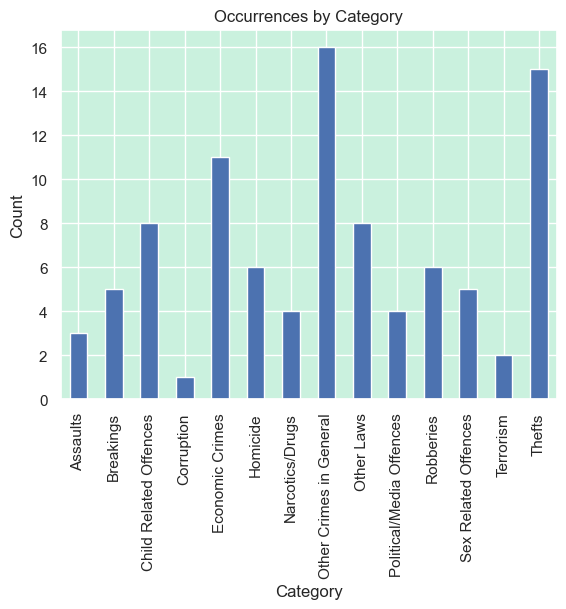

In [35]:
# Group the DataFrame by the 'Category' column and calculate the count of occurrences
grouped_df = df1.groupby('Category').size()

# Plot a bar chart of the grouped data
grouped_df.plot(kind='bar')

# Set the labels and title of the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Occurrences by Category')

# Display the plot
plt.show()

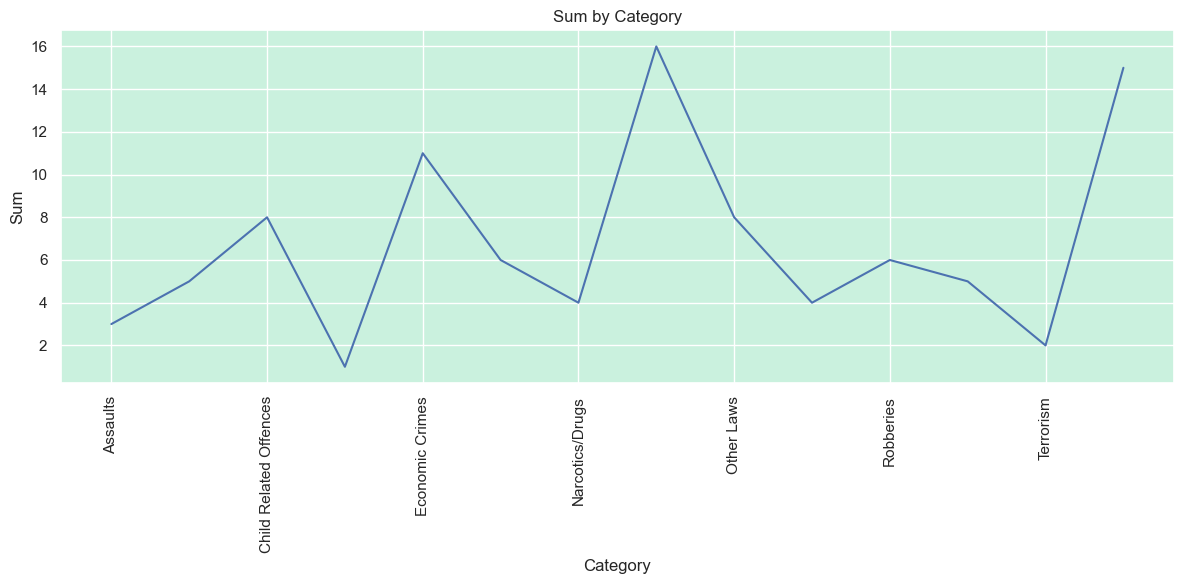

In [36]:
# Group the DataFrame by the 'Category' column and calculate the sum of values
grouped_df = df1.groupby('Category').size()

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width as desired

# Plot a line chart of the grouped data
grouped_df.plot(kind='line')

# Set the labels and title of the plot
plt.xlabel('Category')
plt.ylabel('Sum')
plt.title('Sum by Category')

# Rotate x-labels at a 90-degree angle
plt.xticks(rotation=90)

# Adjust spacing between x-tick labels
plt.tight_layout()

# Display the plot
plt.show()

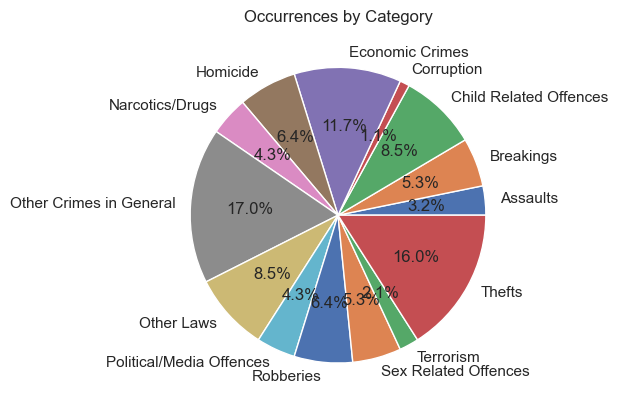

In [37]:
# Group the DataFrame by the 'Category' column and calculate the count of occurrences
grouped_df = df1.groupby('Category').size()

# Plot a pie chart of the grouped data
grouped_df.plot(kind='pie', autopct='%1.1f%%')

# Set the title of the plot
plt.title('Occurrences by Category')

# Display the plot
plt.show()


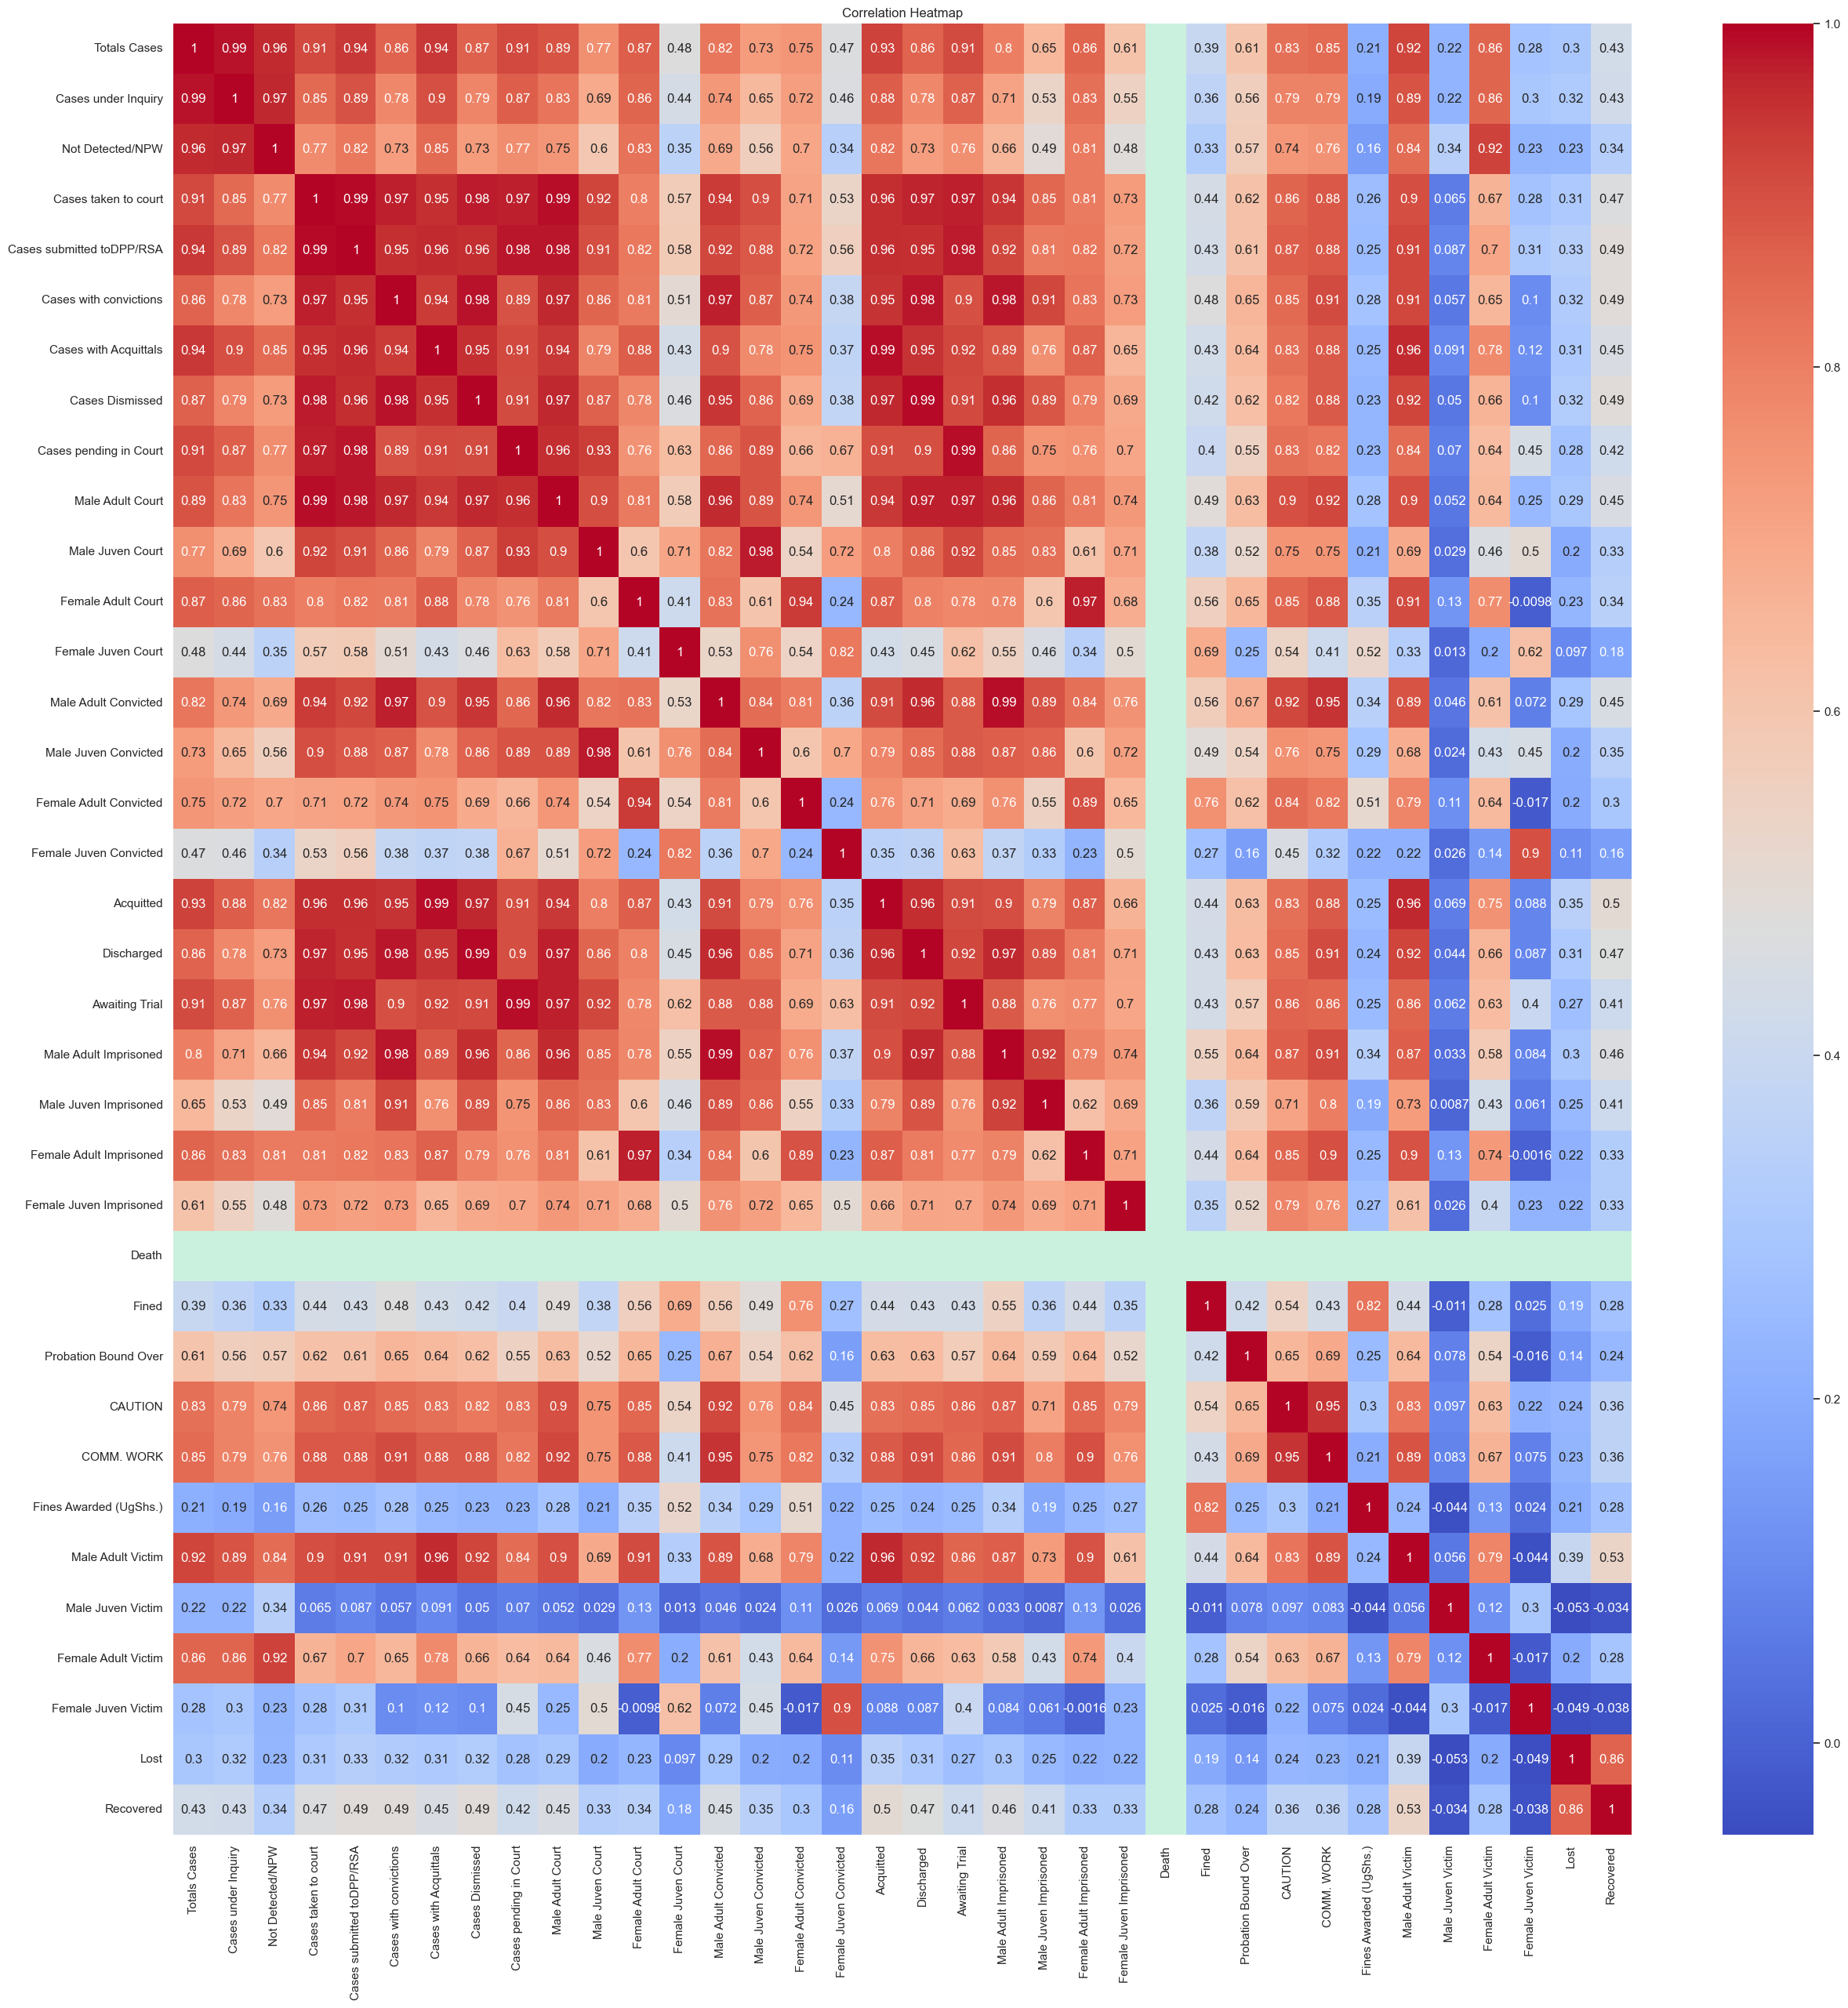

In [38]:
# Generate a correlation heatmap for numerical columns
correlation = df1.drop(['S/No.', 'Case/Crime Incidences', 'Category'], axis=1).corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()